# 🔍 Exploratory Data Analysis (EDA)

##### Now that our dataset is cleaned, structured, and all variables have been clearly identified, we move into Exploratory Data Analysis (EDA) the heart of understanding what the data is truly telling us.

##### This phase involves:

 i. Uncovering patterns, trends, and relationships in the data.

 ii. Visualizing how inflation has changed over time.

 iii. Investigating how different economic sectors and indicators correlate with Nigeria’s inflation rates.

In [2]:
# Import all necessery libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import missingno as msno
import matplotlib.dates as mdates

from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax, skew
style.use('fivethirtyeight')

# import analysis ready dataset

In [3]:
df=pd.read_csv("analysis_ready_dataset.csv")
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date
0,2008,Jan,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,Feb,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,Mar,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,Apr,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,May,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,Feb,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01
194,2024,Mar,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01
195,2024,Apr,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01
196,2024,May,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01


# PHASE 1: 📈 Trend Analysis (Univariate Analysis)

##### Trend analysis involves examining how a particular variable in this case Inflation Rate changes over time. I use line plots, seasonal comparisons, and year-on-year evaluations to identify patterns, cycles, and anomalies.

## 🎯 Why It Matters for This Project:
##### Since the goal is to understand the drivers of inflation in Nigeria, it’s essential to first understand how inflation behaves over time:

 i. Peaks and dips in inflation may align with real-world events (e.g., oil price shocks, economic downturns, policy changes).

 ii. Seasonal patterns can reveal whether inflation consistently rises or falls during certain months or quarters.

 iii. Long-term trends help us see whether inflation is accelerating, stabilizing, or fluctuating unpredictably.

# Trend Analysis plot

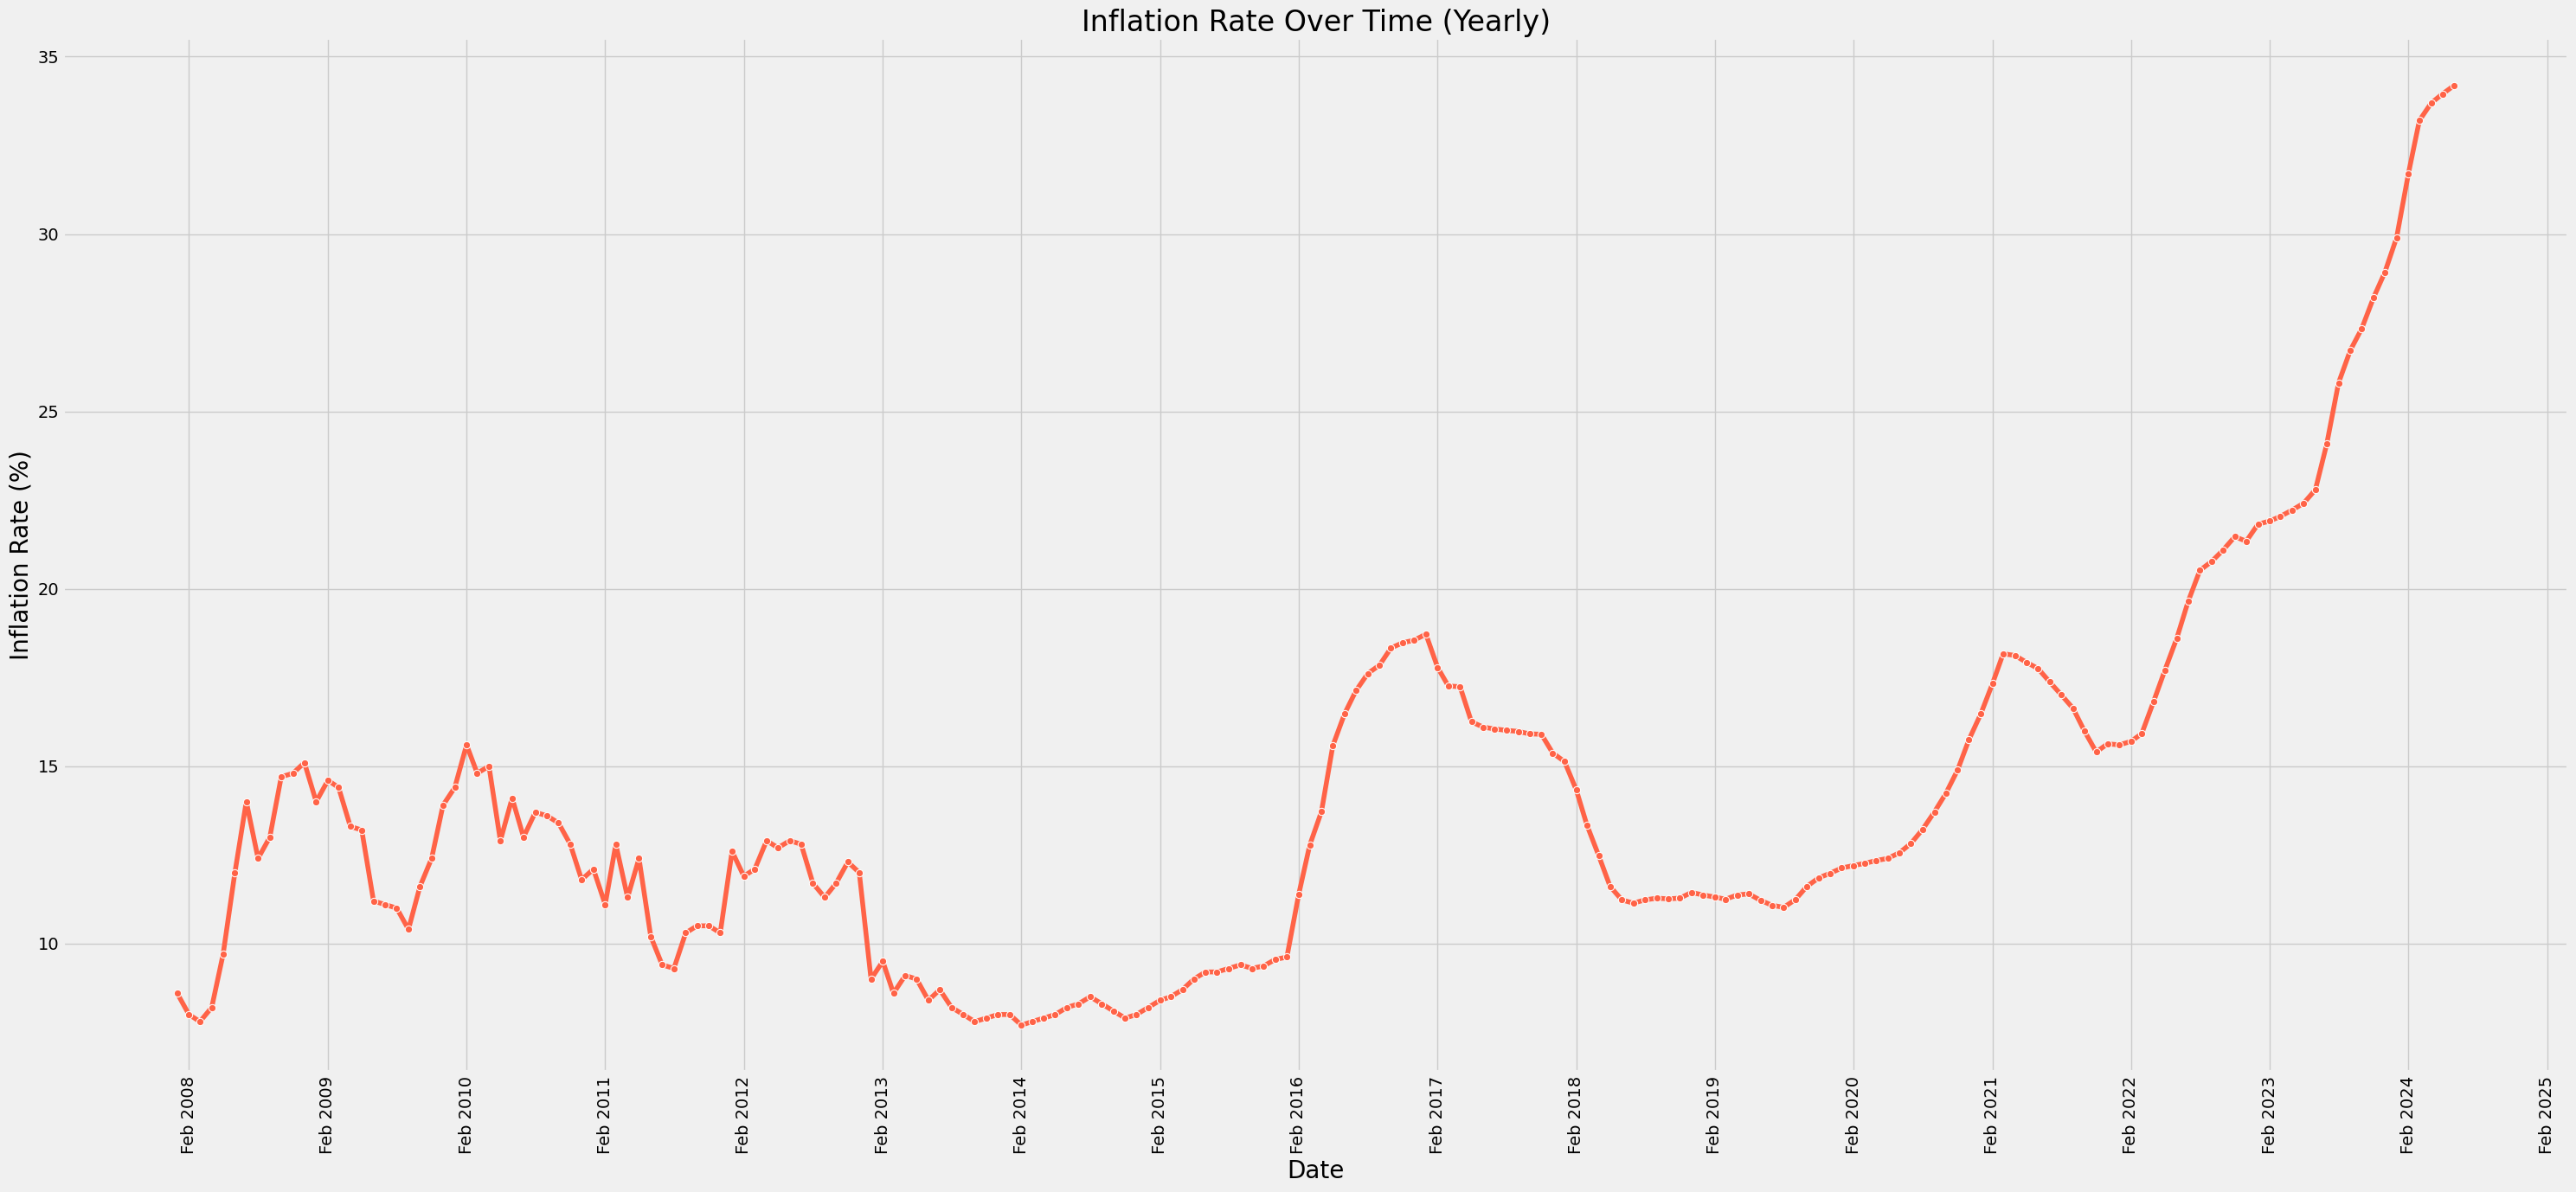

In [7]:
import matplotlib.dates as mdates

# Ensure Month is two-digit and Year is numeric
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Create proper datetime object
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2) + '-01')

# Sort by date
df = df.sort_values('Date')

# Set figure size and style
plt.figure(figsize=(30, 14))
sns.lineplot(x='Date', y='Inflation_Rate', data=df, marker='o', color='tomato')

# Titles and labels
plt.title('Inflation Rate Over Time (Yearly)', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Inflation Rate (%)', fontsize=20)

# Format x-axis ticks to show fewer dates (e.g., every 12 months)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 🔍 Insights from plot

 With this plot I set out to answer two major questions which are;


## 1. Does inflation spike at certain times over the years?
 ✅ Answer: Yes — inflation shows clear spikes at different periods.

##### From your graph:

 2016: A major spike, peaking around mid-year.

 2021–2024: A sustained, steep rise, peaking sharply toward 2024.

 2009–2011: Minor spikes, though not as steep as recent years.

 These spikes do not follow a fixed interval, so they’re more influenced by economic events or policy changes rather than predictable cycles.

 So, inflation spikes are real and noticeable, but not strictly periodic.

## 2. Are there recurring dips or climbs in certain months?
 🟡 Answer: Hard to tell from this chart alone — I need a different plot.

 The current chart shows overall trends, but monthly seasonality is hard to observe because the x-axis is stretched across many years.
 So i'm going to create a boxplot of inflation by month, across all years:

C:\Users\USER\AppData\Local\Temp\ipykernel_572\745049785.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Inflation_Rate', data=df, order=month_order, palette='coolwarm')


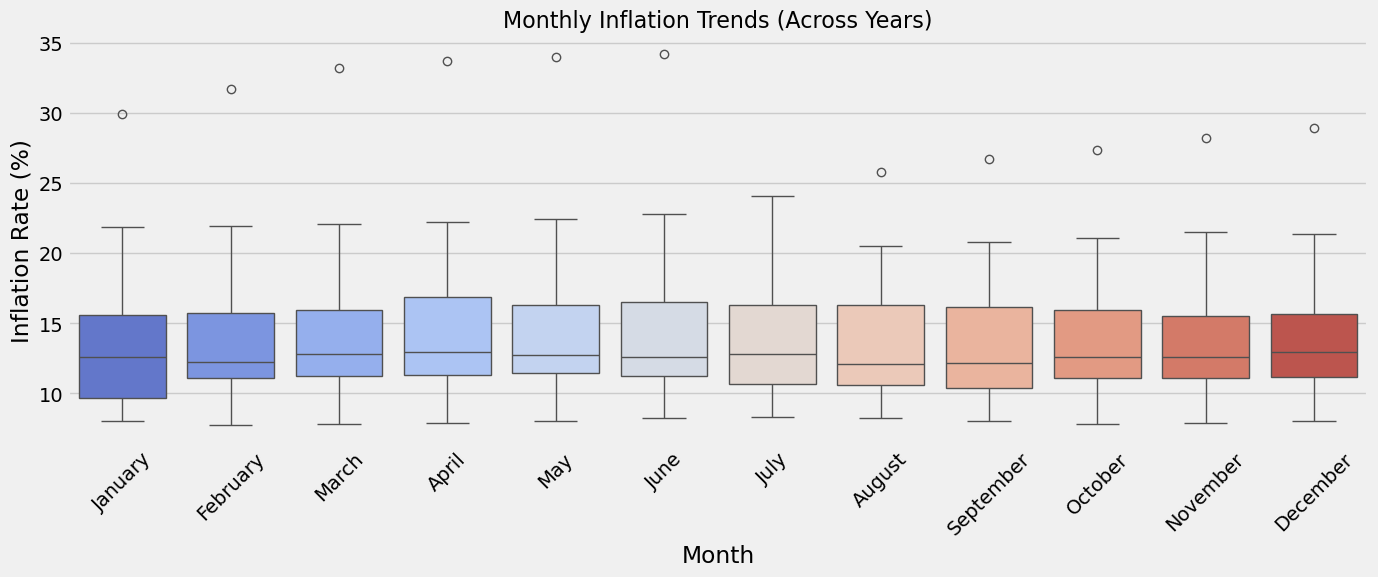

In [9]:
# Add Month Name column (e.g., 'Jan', 'Feb')
df['Month'] = df['Date'].dt.month_name()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Boxplot of inflation by month
plt.figure(figsize=(14, 6))
sns.boxplot(x='Month', y='Inflation_Rate', data=df, order=month_order, palette='coolwarm')
plt.title('Monthly Inflation Trends (Across Years)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ✅ What we can interpret from the boxplot:
### 1. Median values (central tendency):

 Months like January, February, and March show slightly higher medians.

 Months like August and September seem to have slightly lower medians.

 But overall, monthly medians are quite similar suggesting no strong seasonality.

### 2. Range and variability:

 The spread (IQR) is fairly consistent across all months, but:

 April, July, and December show slightly wider ranges, meaning higher variability in inflation during those months over the years.

 Outliers (dots above the whiskers) are present in nearly every month, but not concentrated in one month, so extreme values are not month-specific.

## ✅ Conclusion:
##### There are no consistent recurring dips or climbs in certain months. While some months like January and April show slightly higher medians and others like August show lower medians, the differences are minor. Inflation changes appear to be driven more by broader economic factors than by regular monthly seasonality.

## 📌 Overview:
##### To wrap up this phase I'd like to note that inflation in this dataset appears to be driven primarily by external macroeconomic trends and shocks, not by seasonal or monthly recurring factors. While specific years saw steep inflationary trends, these were irregular and event-driven.

# PHASE 2: 📊  Correlation Assessment (Bi-variate Analysis)

In this phase, I aim to analyze the relationships between inflation and other key economic variables. These variables may include:

-- Crude Oil Price      
-- Production           
-- Crude Oil Export     
-- CPI_Food             
-- CPI_Energy           
-- CPI_Health           
-- CPI_Transport        
-- CPI_Communication    
-- CPI_Education

I’ll use correlation coefficients, scatter plots, and possibly heatmaps to explore how closely (or not) these variables move in relation to inflation.

# 🎯 What am I trying to find out?
### The main questions we want to answer in this phase are:

## 1. Which variables have the strongest correlation with inflation?
This will help me identify leading indicators or potential drivers of inflation.

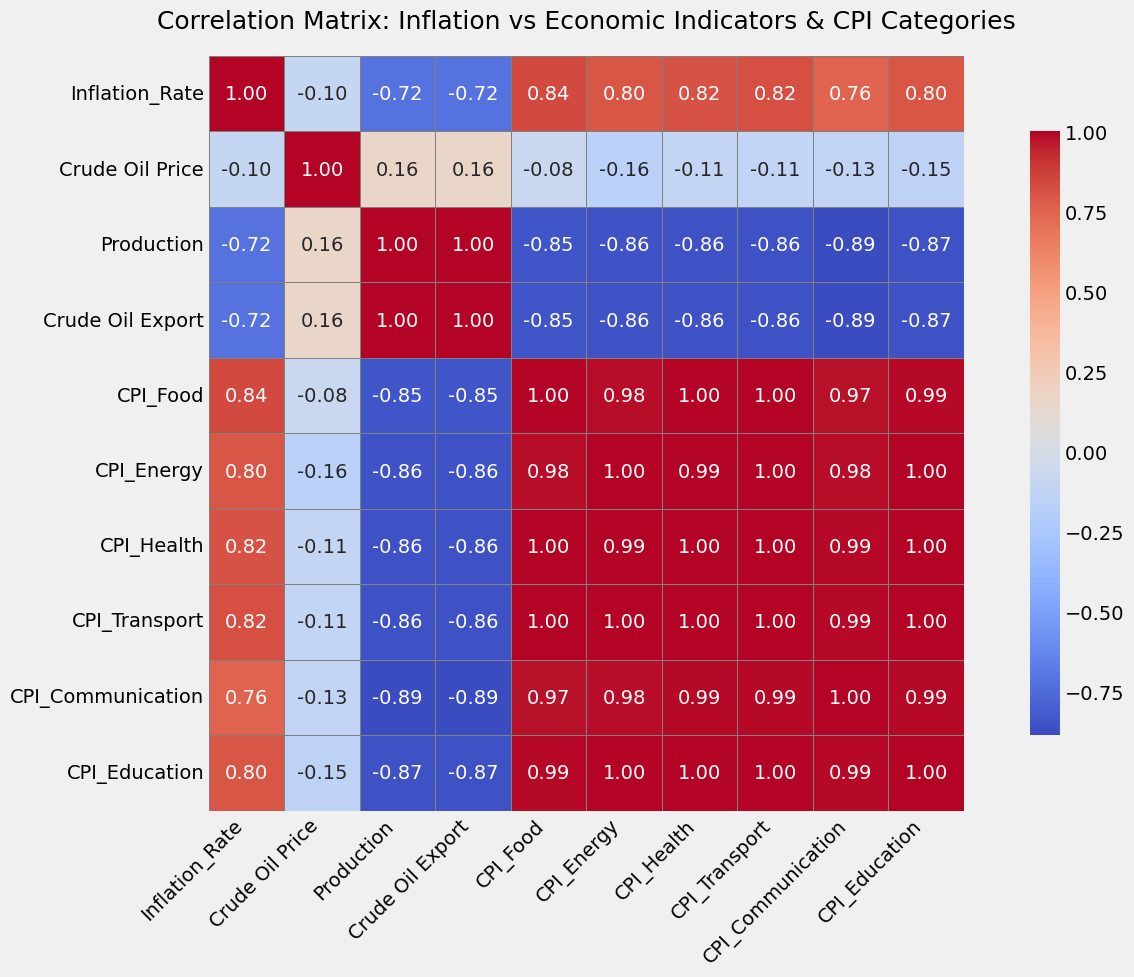

In [5]:
# 1. Define the relevant columns for correlation
corr_columns = [
    'Inflation_Rate', 'Crude Oil Price', 'Production', 'Crude Oil Export',
    'CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport', 
    'CPI_Communication', 'CPI_Education'
]

# 2. Compute the correlation matrix
corr_matrix = df[corr_columns].corr()

# 3. Set up the plot
plt.figure(figsize=(14, 10))  # Larger figure for readability

# 4. Create the heatmap with styling
sns.heatmap(
    corr_matrix,
    annot=True,                   # Show correlation coefficients
    cmap='coolwarm',              # Diverging color palette (red to blue)
    fmt=".2f",                    # Format float values to 2 decimal places
    linewidths=0.5,               # Thin lines between cells
    linecolor='gray',             # Light gray grid lines
    square=True,                  # Make cells square-shaped
    cbar_kws={"shrink": 0.8}      # Shrink colorbar for better layout
)

# 5. Add title and adjust layout
plt.title('Correlation Matrix: Inflation vs Economic Indicators & CPI Categories', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better fit
plt.yticks(rotation=0)               # Keep y-ticks horizontal
plt.tight_layout()
plt.show()


# 📊 Correlation Assessment – Overview
To explore how different economic indicators relate to inflation, we generated a heatmap visualizing the correlation between the Inflation Rate and various predictor variables, including Crude Oil Price, Production, Exports, and CPI categories like Food, Transport, and Energy.

### 🔍 Key Observations:
#### 🔺 Strong Positive Correlations with Inflation:
-- CPI_Food (0.84)

-- CPI_Health (0.82)

-- CPI_Transport (0.82)

-- CPI_Energy (0.80)

-- CPI_Education (0.80)

-- CPI_Communication (0.76)

These are all components of inflation (i.e., parts of the Consumer Price Index). So it's expected that they rise and fall with the inflation rate. Their strong correlation confirms that changes in these categories reflect broader inflationary trends not necessarily cause them.

🧠 Interpretation: These indicators mirror inflation but don’t necessarily drive it. They are symptoms, not root causes.

##### 🔻 Strong Negative Correlations with Inflation:
-- Production (–0.72)

-- Crude Oil Export (–0.72)

This is more revealing. As production and exports increase, inflation tends to fall. This inverse relationship suggests these may be influencing inflation potentially by:

Increasing supply to meet demand (production)

Strengthening the currency through forex earnings (exports)

Enhancing economic stability

### 💡 Interpretation: These could be leading indicators or potential drivers of inflation. Their behavior might shape inflation trends rather than simply respond to them.

### 🧭 Next Step: Investigating Causality
We’re now moving into a deeper analysis to answer:

Do production and export levels actually help reduce inflation or is the relationship merely coincidental?

To explore this, we'll examine: Visual relationships via scatter plots

This step is crucial to distinguish true influencers from correlated effects helping us better understand what truly drives inflation, not just what changes with it.

# 📊 Inflation VS Production

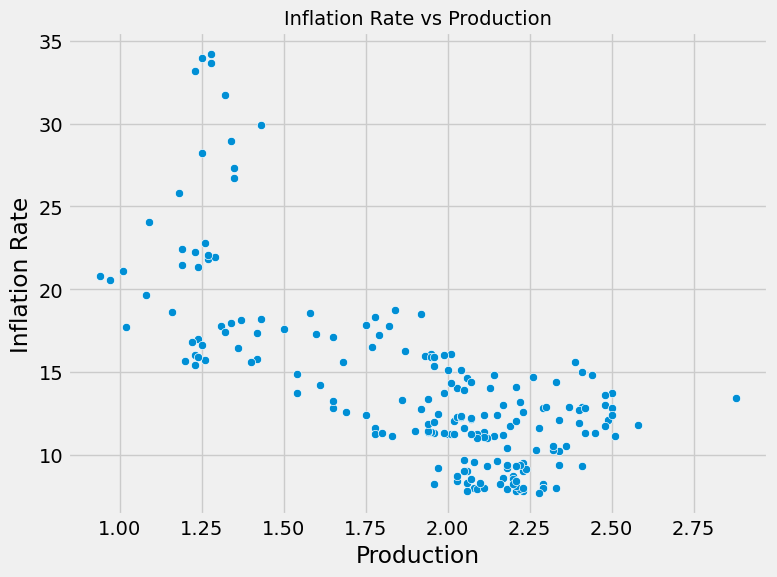

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Production', y='Inflation_Rate')
plt.title('Inflation Rate vs Production', fontsize=14)
plt.xlabel('Production')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔍 Observation:
 There's a clear negative correlation. As production increases, inflation rate tends to drop. This simply means higher production might reduce inflation through increased supply and economic efficiency.

# 🧭 Temporal trends (does a rise in production precede a dip in inflation?)
I also wanted to check if lagged production (e.g., from 1–3 months prior) has a stronger inverse correlation than current production, it supports the idea that production influences inflation with a time delay.





In [7]:
# Create lagged versions of Production (e.g., 1, 2, 3 months before)
df['Production_lag1'] = df['Production'].shift(1)
df['Production_lag2'] = df['Production'].shift(2)
df['Production_lag3'] = df['Production'].shift(3)


In [8]:
# Check correlation of lagged Production with current Inflation
lagged_corrs = df[['Inflation_Rate', 'Production_lag1', 'Production_lag2', 'Production_lag3']].corr()
print(lagged_corrs)


                 Inflation_Rate  Production_lag1  Production_lag2  \
Inflation_Rate         1.000000        -0.729803        -0.737005   
Production_lag1       -0.729803         1.000000         0.960205   
Production_lag2       -0.737005         0.960205         1.000000   
Production_lag3       -0.742518         0.943079         0.959684   

                 Production_lag3  
Inflation_Rate         -0.742518  
Production_lag1         0.943079  
Production_lag2         0.959684  
Production_lag3         1.000000  


<Figure size 1200x400 with 0 Axes>

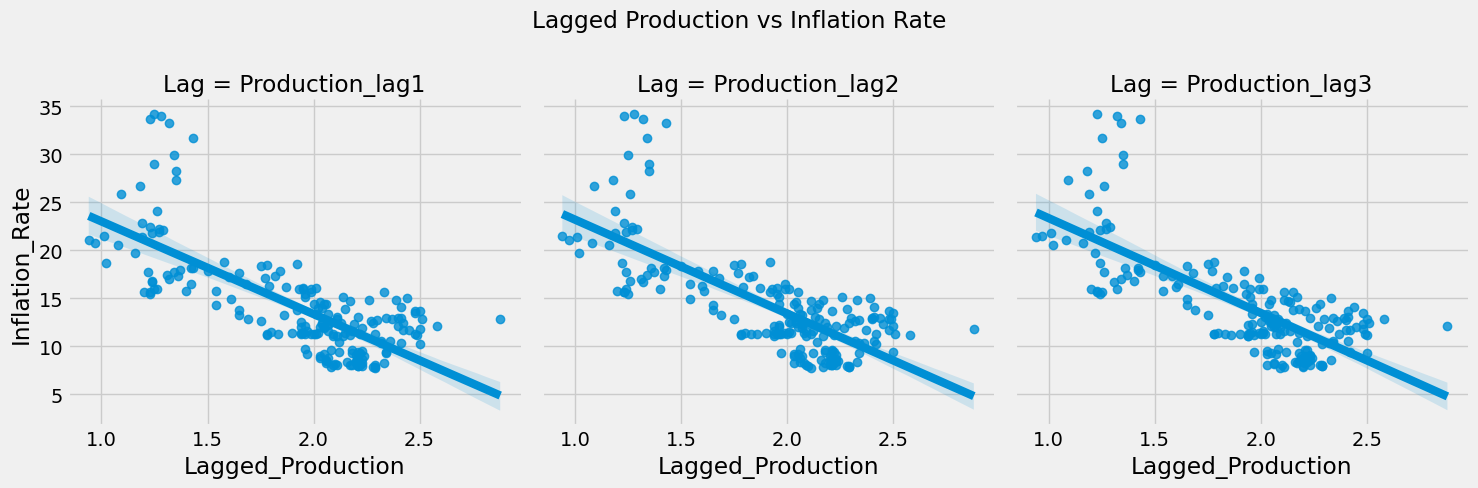

In [ ]:

# Melt the lagged data for easier plotting
melted = df[['Inflation_Rate', 'Production_lag1', 'Production_lag2', 'Production_lag3']].melt(id_vars='Inflation_Rate', var_name='Lag', value_name='Lagged_Production')

plt.figure(figsize=(12, 4))
sns.lmplot(data=melted, x='Lagged_Production', y='Inflation_Rate', col='Lag', aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle('Lagged Production vs Inflation Rate')
plt.show()


# 🔍 Observation:
All three plots show a strong, consistent downward trend. The linear regression lines indicate a persistent inverse relationship even with time lags.
This strengthens the causal inference rising production seems to precede falling inflation, especially since the effect holds across multiple lag periods.

This temporal precedence is a key indicator for potential causality.

# 💡 conclusion:
There is strong visual and statistical support that production could be a causal driver of inflation changes.
While not definitive proof, this analysis gives a solid foundation for that hypothesis.



# 📊 Inflation VS Crude Oil Export

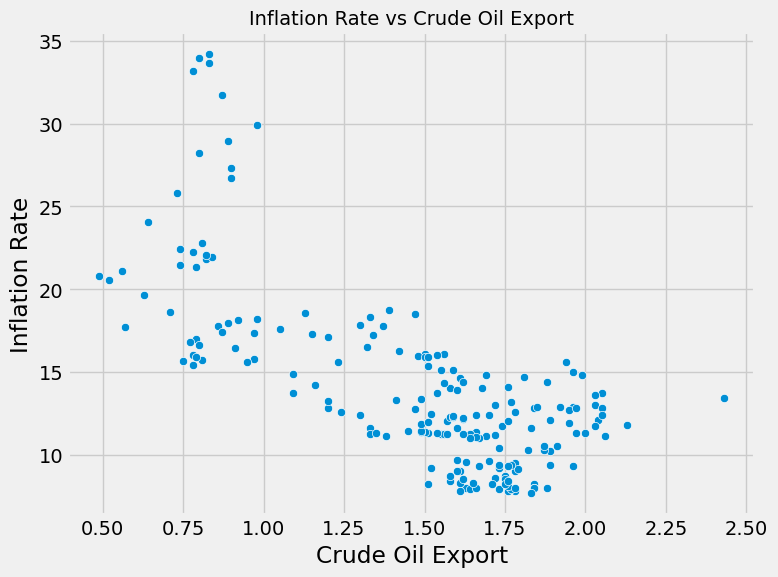

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Crude Oil Export', y='Inflation_Rate')
plt.title('Inflation Rate vs Crude Oil Export', fontsize=14)
plt.xlabel('Crude Oil Export')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔍 Observation:
The scatter plot shows a clear negative relationship as Crude Oil Export increases, the Inflation Rate tends to decrease.
The pattern is very similar to the one observed between Production and Inflation.

## 🧠 What This Implies:
This suggests that higher crude oil export may be linked to lower inflation.

Possible interpretation:
Increased foreign exchange earnings from oil exports can stabilize the currency, reducing import costs.
This could directly ease inflationary pressures, especially in oil-dependent economies.

# 📉 Quick Overview:
Both Production and Crude Oil Export show strong inverse relationships with inflation.
These visual trends support the hypothesis that increased economic output and exports help curb inflation.

Together, they reinforce the idea that supply-side strength (domestic or external) is a key factor in inflation control.

# 🧩 Introducing Sectoral CPI Impact Plots
So far, we’ve explored the macroeconomic view showing how crude oil production and exports correlate with overall inflation. But inflation doesn’t impact all areas of the economy equally.

To get a more nuanced picture, we now turn to sectoral Consumer Price Index (CPI) data — specifically:

-- Food CPI

-- Housing CPI

-- Transport CPI

-- Health CPI, etc.

# 🎯 Why This Matters
While the overall inflation rate gives a big-picture view, sectoral CPI data allows us to:

-- Identify which sectors are most sensitive to oil-related activities.

-- Understand how inflation is distributed across households and industries.

-- Pinpoint which sectors could be driving or absorbing inflationary pressures when oil exports or production change.

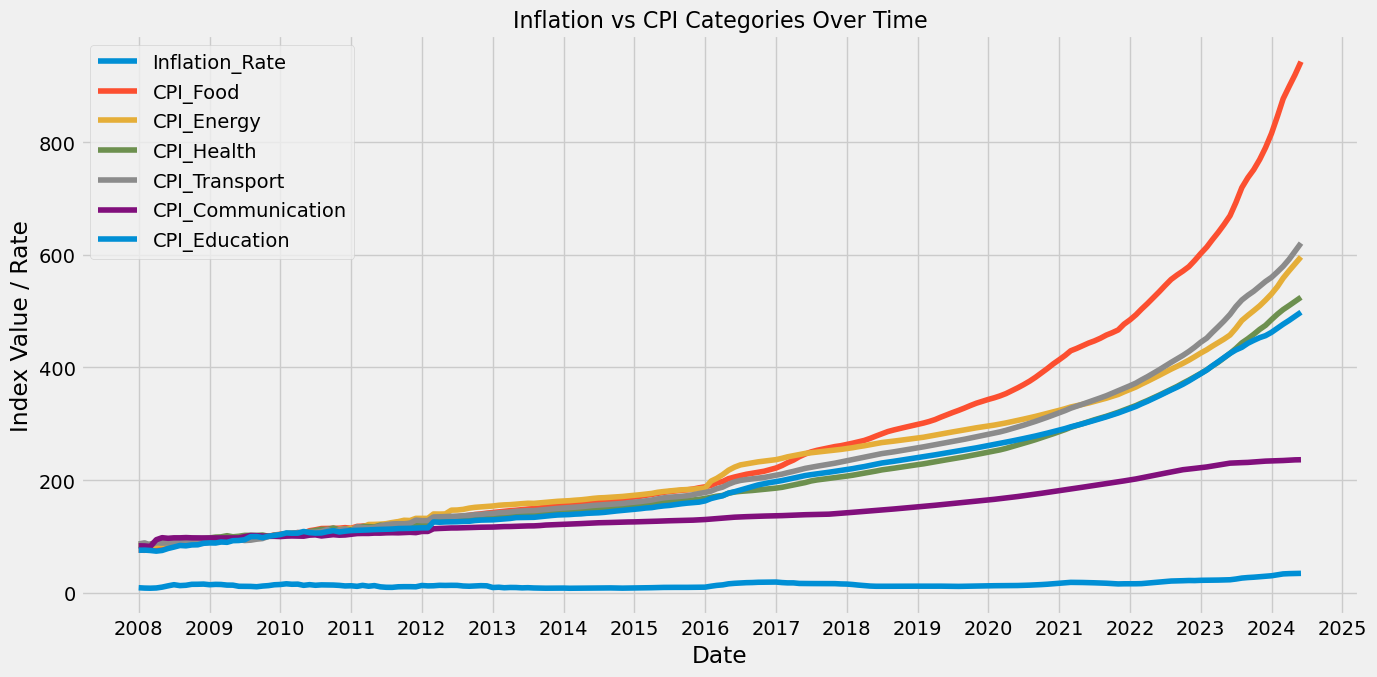

In [ ]:
columns_to_plot = ['Inflation_Rate', 'CPI_Food', 'CPI_Energy', 'CPI_Health','CPI_Transport', 'CPI_Communication', 'CPI_Education']

# Ensure your Date column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Plot
plt.figure(figsize=(14, 7))
for col in columns_to_plot:
    plt.plot(df['Date'], df[col], label=col)

# Format the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # One tick per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'YYYY'

plt.title('Inflation vs CPI Categories Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Index Value / Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# 🔎 Overview of Sectoral CPI Impact Plots
These plots visualize how crude oil export and production relate to sector-specific inflation across areas like food, transport, energy, and health.

Since inflation directly influences the Consumer Price Index (CPI), these sectors are particularly important to analyze. They represent essential components of daily life areas where price changes most directly affect households and quality of life.

Sectors like food and transport are especially sensitive to shifts in oil-related activity due to their reliance on logistics and energy inputs. Likewise, energy and health costs often rise with broader inflation, compounding pressure on both individuals and policymakers.

These plots help us understand which parts of the economy bear the brunt of inflation when oil variables fluctuate and which ones might signal broader economic shifts.

# 🔮 What’s Next: Preparing for Predictive Analysis
With these relationships clearly mapped out, the next step is to prepare the dataset for predictive modeling. This will allow us to forecast inflation or CPI changes based on trends in oil production/export equipping policymakers and analysts with a data-driven tool for economic planning.